# In the below mentioned data, I have performed Exploratory Data Analysis(EDA) on the sales done by an organization across various States of USA and in the various categories

importing libraries for data cleaning and visualizing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',parse_dates = ['Order Date'], index_col = ['Order Date'])
df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2017-08-11,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2017-08-11,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2017-12-06,3,CA-2017-138688,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
2016-11-10,4,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
2016-11-10,5,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-21,9796,CA-2017-125920,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
2016-12-01,9797,CA-2016-128608,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
2016-12-01,9798,CA-2016-128608,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880


Once the dataset has been loaded, we shall check the data_type of the various columns 

After that, the data cleaning shall start which includes finding and removing null values, duplicates, and outliers

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9800 entries, 2017-08-11 to 2016-12-01
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), int64(1), object(14

In [4]:
df.isnull().sum()

Row ID            0
Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
df.duplicated().sum() # there are no duplicate values in the dataset

0

In [6]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


As we can see that there is a greater difference between the 75 percentile and the max value in case of Sales. We need to find out is the max value correct or an outlier

In [7]:
df[df['Sales'] > 18000]

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2015-03-18,2698,CA-2015-145317,23/03/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48


In [8]:
florida = df[df['State'] == 'Florida']
florida.loc[florida['Ship Date']  == '23/03/2015']

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2015-03-18,2697,CA-2015-145317,23/03/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,TEC-MA-10003626,Technology,Machines,Hewlett-Packard Deskjet 6540 Color Inkjet Printer,821.300
2015-03-18,2698,CA-2015-145317,23/03/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480
2015-03-18,2699,CA-2015-145317,23/03/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,OFF-PA-10001804,Office Supplies,Paper,Xerox 195,21.376
2015-03-18,2700,CA-2015-145317,23/03/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,OFF-AR-10003183,Office Supplies,Art,Avery Fluorescent Highlighter Four-Color Set,8.016
2015-03-18,2701,CA-2015-145317,23/03/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,FUR-FU-10004270,Furniture,Furnishings,"Executive Impressions 13"" Clairmont Wall Clock",30.768
2015-03-18,2702,CA-2015-145317,23/03/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,OFF-FA-10003112,Office Supplies,Fasteners,Staples,18.936
2015-03-18,2703,CA-2015-145317,23/03/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,FUR-FU-10001986,Furniture,Furnishings,"Dana Fluorescent Magnifying Lamp, White, 36""",122.352


In [9]:
florida.loc[florida['Sub-Category']  == 'Machines']

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2017-07-23,836,CA-2017-165316,27/07/2017,Standard Class,JB-15400,Jennifer Braxton,Corporate,United States,Tampa,Florida,33614.0,South,TEC-MA-10004002,Technology,Machines,Zebra GX420t Direct Thermal/Thermal Transfer P...,265.475
2015-03-18,2697,CA-2015-145317,23/03/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,TEC-MA-10003626,Technology,Machines,Hewlett-Packard Deskjet 6540 Color Inkjet Printer,821.300
2015-03-18,2698,CA-2015-145317,23/03/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480
2017-09-06,2839,CA-2017-147368,12/6/2017,First Class,TC-21295,Toby Carlisle,Consumer,United States,Tallahassee,Florida,32303.0,South,TEC-MA-10002178,Technology,Machines,Cisco CP-7937G Unified IP Conference Station P...,695.700
2016-11-22,5759,CA-2016-149300,23/11/2016,First Class,BH-11710,Brosina Hoffman,Consumer,United States,Hialeah,Florida,33012.0,South,TEC-MA-10000423,Technology,Machines,Texas Instruments TI-34 Scientific Calculator,32.985
2018-12-25,8958,CA-2018-105620,28/12/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Hialeah,Florida,33012.0,South,TEC-MA-10004626,Technology,Machines,Lexmark 20R1285 X6650 Wireless All-in-One Printer,120.000


In [10]:
# from the above two dataset we can easily determine that this is an outlier therefore we need to remove it 

In [11]:
new_df = df[df['Sales'] < 18000]
new_df['Sales'].describe()

count     9799.000000
mean       228.482325
std        584.364362
min          0.444000
25%         17.248000
50%         54.480000
75%        210.572000
max      17499.950000
Name: Sales, dtype: float64

In [12]:
new_df.shape

(9799, 17)

In [13]:
new_df['Postal Code'].unique()

array([42420., 90036., 33311., 90032., 28027., 98103., 76106., 53711.,
       84084., 94109., 68025., 19140., 84057., 90049., 77095., 75080.,
       77041., 60540., 32935., 55122., 48185., 19901., 47150., 10024.,
       12180., 90004., 60610., 85234., 22153., 10009., 49201., 38109.,
       77070., 35601., 94122., 27707., 60623., 29203., 55901., 55407.,
       97206., 55106., 80013., 28205., 60462., 10035., 50322., 43229.,
       37620., 19805., 61701., 85023., 95661., 64055., 91104., 43055.,
       53132., 85254., 95123., 98105., 98115., 73034., 90045., 19134.,
       88220., 78207., 77036., 62521., 71203.,  6824., 75051., 92374.,
       45011.,  7090., 19120., 44312., 80219., 75220., 37064., 90604.,
       48601., 44256., 43017., 48227., 38401., 33614., 95051., 55044.,
       92037., 77506., 94513., 27514.,  7960., 45231., 94110., 90301.,
       33319., 80906.,  7109., 48180.,  8701., 22204., 80004.,  7601.,
       33710., 19143., 90805., 92345., 37130., 84041., 78745.,  1852.,
      

In [14]:
new_df.isnull().sum()

Row ID            0
Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [39]:
new_df = new_df.dropna()

In [41]:
new_df.isnull().sum()

Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [43]:
new_df.shape

(9788, 17)

In [47]:
new_df.head(2)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2017-08-11,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
2017-08-11,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


Once all the outliers have been removed we shall check the category wise sales and the state wise sales as well

In [ ]:
011-61606161

In [56]:
state = new_df.groupby('State')['Sales'].sum().sort_values(ascending = False)


<AxesSubplot:xlabel='State'>

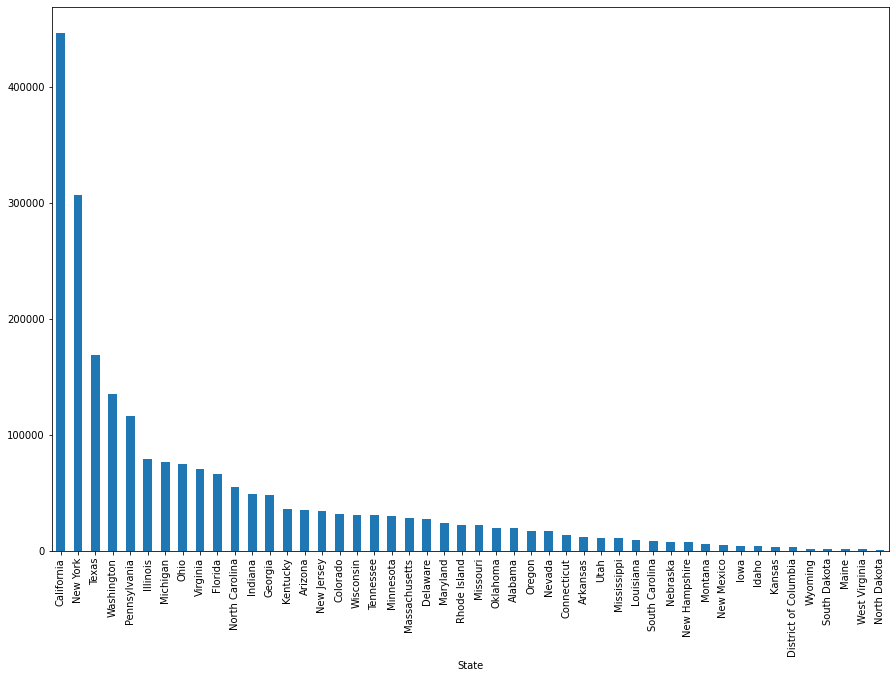

In [57]:
plt.figure(figsize=(15,10))
state.plot(kind = 'bar')

In [61]:
region = new_df.groupby('Region')['Sales'].sum()#.sort_values(ascending = False)

<AxesSubplot:ylabel='Sales'>

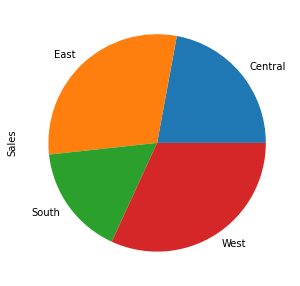

In [62]:
plt.figure(figsize=(15,5))
region.plot(kind='pie')

In [92]:
Central = new_df[new_df['Region'] == 'Central']
Central['State'].unique()

array(['Texas', 'Wisconsin', 'Nebraska', 'Illinois', 'Minnesota',
       'Michigan', 'Indiana', 'Iowa', 'Missouri', 'Oklahoma', 'Kansas',
       'South Dakota', 'North Dakota'], dtype=object)

<AxesSubplot:xlabel='Sub-Category'>

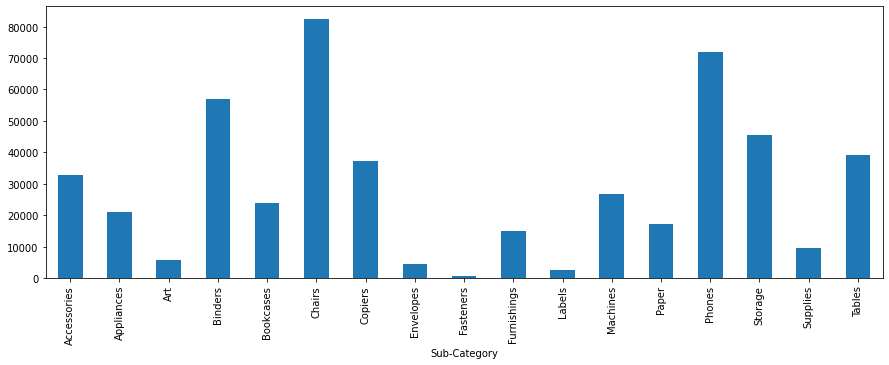

In [86]:
Central = new_df[new_df['Region'] == 'Central']
plt.figure(figsize=(15,5))
Central.groupby('Sub-Category')['Sales'].sum().plot(kind = 'bar')

In [97]:
North_Dakota = new_df[new_df['State'] == 'North Dakota']

<AxesSubplot:xlabel='Sub-Category'>

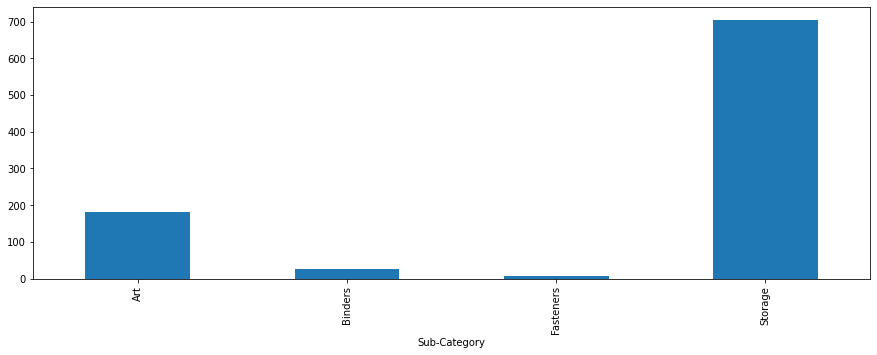

In [98]:
plt.figure(figsize=(15,5))
North_Dakota.groupby('Sub-Category')['Sales'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='Sub-Category'>

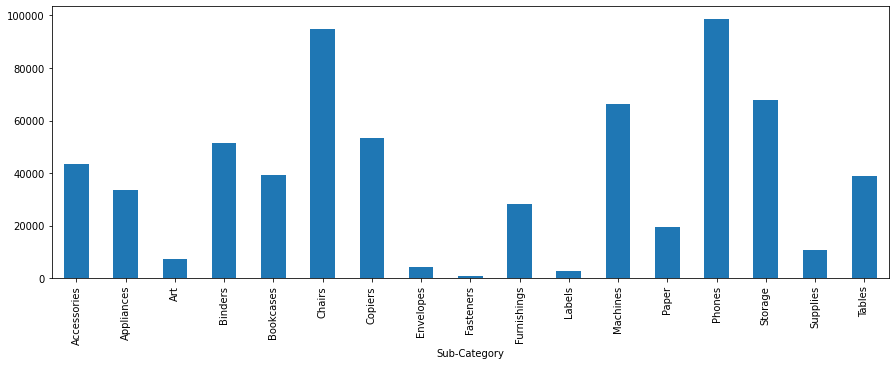

In [87]:
East = new_df[new_df['Region'] == 'East']
plt.figure(figsize=(15,5))
East.groupby('Sub-Category')['Sales'].sum().plot(kind = 'bar')

In [99]:
West = new_df[new_df['Region'] == 'West']
West['State'].unique()

array(['California', 'Washington', 'Utah', 'Arizona', 'Oregon',
       'Colorado', 'New Mexico', 'Nevada', 'Montana', 'Idaho', 'Wyoming'],
      dtype=object)

<AxesSubplot:xlabel='Sub-Category'>

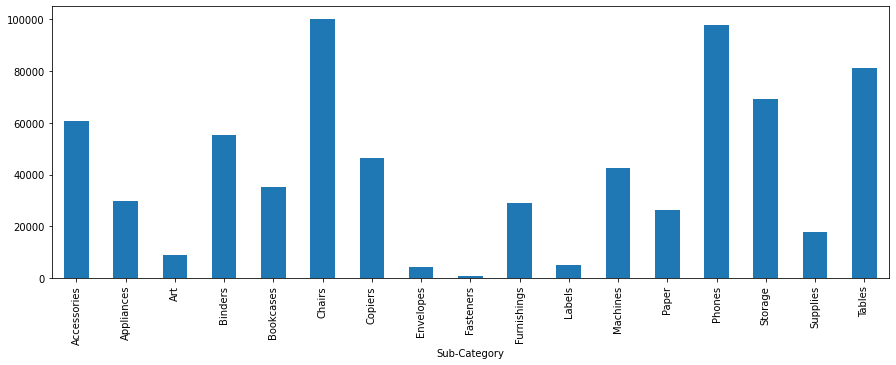

In [88]:
West = new_df[new_df['Region'] == 'West']
plt.figure(figsize=(15,5))
West.groupby('Sub-Category')['Sales'].sum().plot(kind = 'bar')

In [100]:
california = new_df[new_df['State'] == 'California']

<AxesSubplot:xlabel='Sub-Category'>

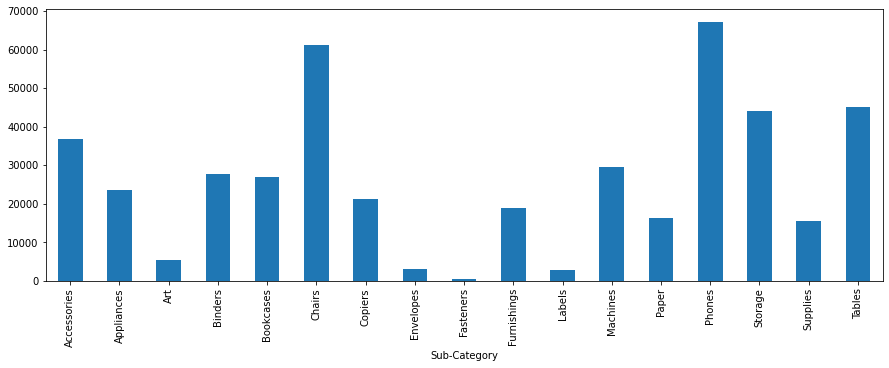

In [101]:
plt.figure(figsize=(15,5))
california.groupby('Sub-Category')['Sales'].sum().plot(kind = 'bar')

In [102]:
South = new_df[new_df['Region'] == 'South']
South['State'].unique()

array(['Kentucky', 'Florida', 'North Carolina', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Louisiana', 'Georgia', 'Mississippi',
       'Arkansas'], dtype=object)

<AxesSubplot:xlabel='Sub-Category'>

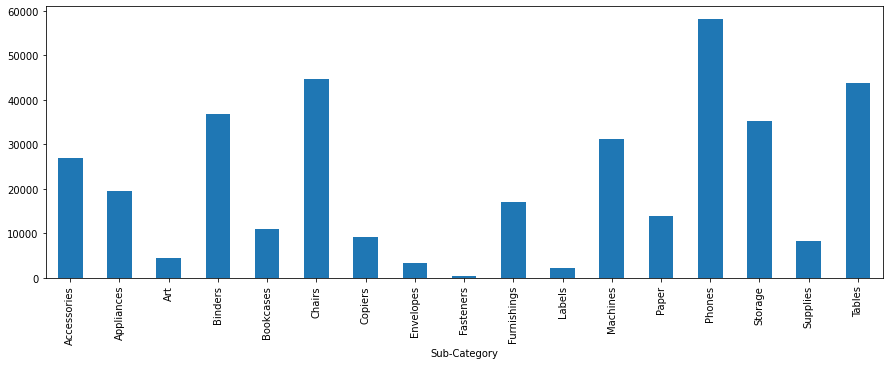

In [89]:
South = new_df[new_df['Region'] == 'South']
plt.figure(figsize=(15,5))
South.groupby('Sub-Category')['Sales'].sum().plot(kind = 'bar')

In [103]:
Florida = new_df[new_df['State'] == 'Florida']

<AxesSubplot:xlabel='Sub-Category'>

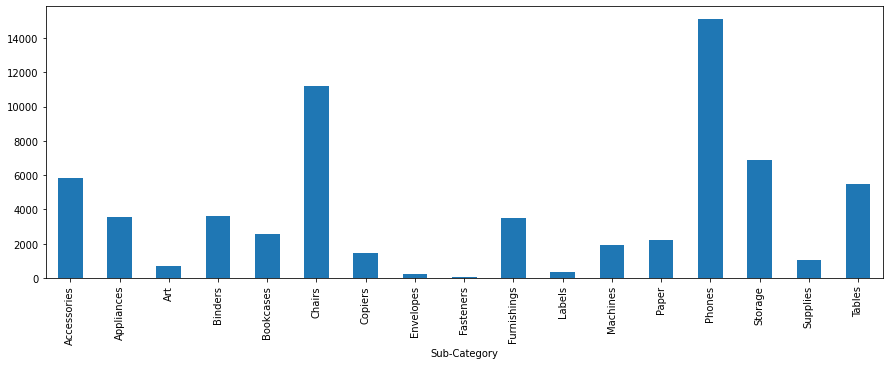

In [104]:
plt.figure(figsize=(15,5))
Florida.groupby('Sub-Category')['Sales'].sum().plot(kind='bar')

In [66]:
Category = new_df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending = False)

<AxesSubplot:xlabel='Sub-Category'>

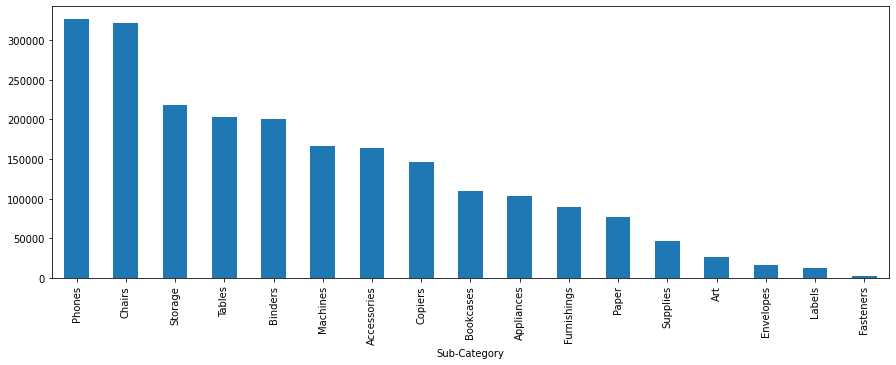

In [67]:
plt.figure(figsize=(15,5))
Category.plot(kind='bar')

<AxesSubplot:xlabel='Order Date'>

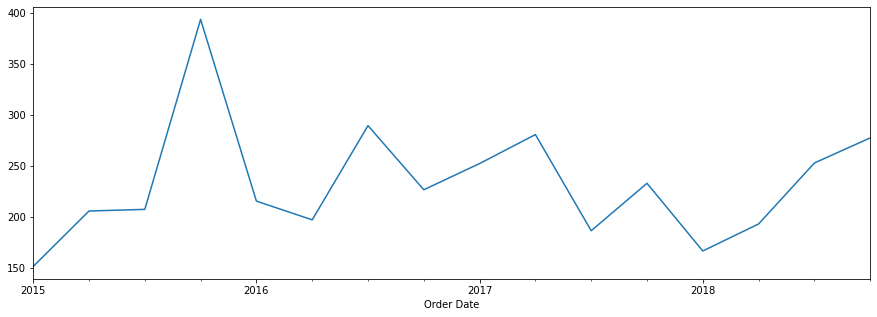

In [120]:
plt.figure(figsize=(15,5))
East['Sales'].resample('Q').mean().plot()

<AxesSubplot:xlabel='Order Date'>

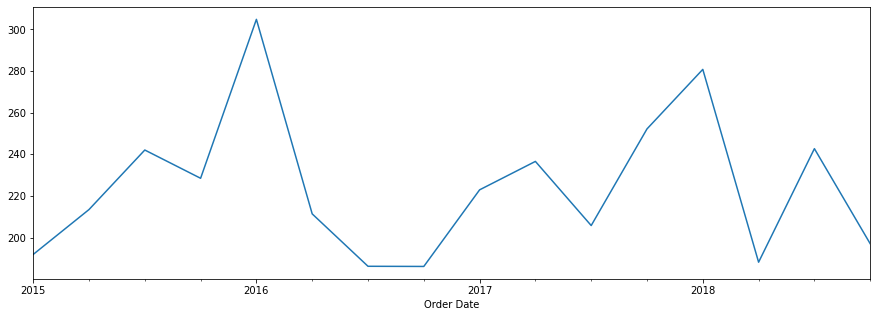

In [121]:
plt.figure(figsize=(15,5))
West['Sales'].resample('Q').mean().plot()

<AxesSubplot:xlabel='Order Date'>

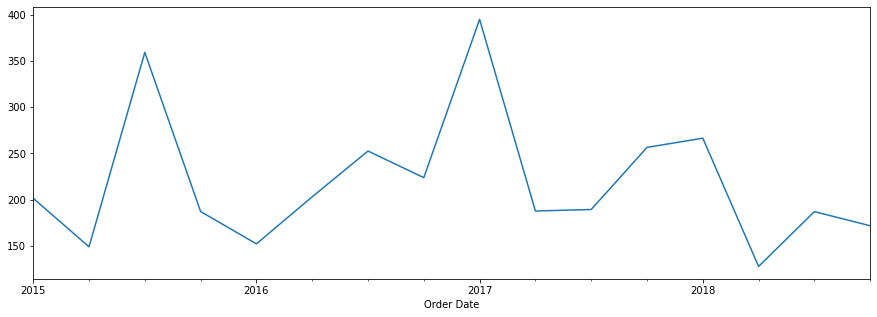

In [122]:
plt.figure(figsize=(15,5))
Central['Sales'].resample('Q').mean().plot()

<AxesSubplot:xlabel='Order Date'>

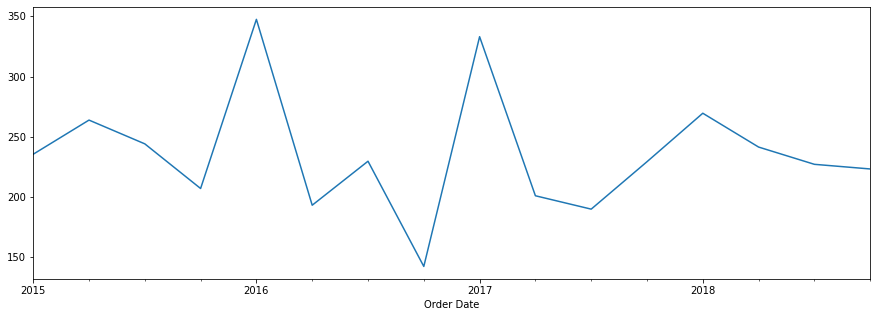

In [123]:
plt.figure(figsize=(15,5))
South['Sales'].resample('Q').mean().plot()

<AxesSubplot:xlabel='Order Date'>

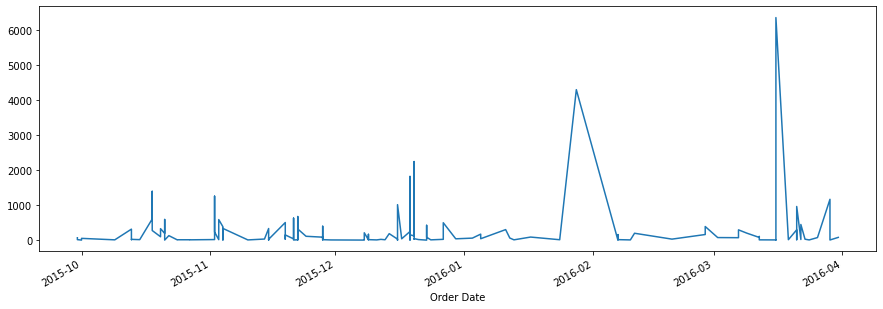

In [135]:
plt.figure(figsize=(15,5))
South.loc['2015-09-30':'2016-03-31','Sales'].plot()

We can state that the sales in the beginning of the year has declined miserably 